# New York Taxi fare predictions

Data set link from kaggle:

We'll train a machine learning model to predict a fare for taxi ride in New York given information like pick up date & time, pickup location, drop location and no. of passangers

This dataset is taken from kaggle competition organized by google cloud. It contains over 55 million rows of data. We attempt to achieve a respectable score in the competition using just a fraction of data. Along the way, we'll look at some practical tips for machine learning. Most of the ideas and techniques covered in this notebook are derived from public notebooks and blog posts.

You can find a completed version of this notebook in github : https://github.com/NC20965/Banking_Application


TIP #1 Create outline for the notebook & for each section before start coding

Here outline of the notebook
    1. Download the datasheet
    2. Explore and analyze the dataset
    3. Prepare the dataset for machine learning training
    4. Train hard corded and baseline model
    5. make predition and submit to kaggle
    6. Perfom feature engineering 
    7. Train and evaluate different models
    8. Tune hyperparameters for the best model
    9.Train on the GPU with the entire dataset
    10. Documentation & publish documentation for the project 
    

# 1. Download the dataset

Steps
  * Install required libraries
  * Download  data from kaggle
  * View dataset files
  * Load traing set with pandas
  * Load test data with pandas

    

# Install require libraries

In [1]:
!pip install opendatasets pandas numpy scikit-learn xgboost --quiet


# Download from kaggle

We'll use opendataset library to download the dataset. You'll need to upload you API KEY ( a file called kaggle.json) to colab


In [2]:
#import opendatasets as od

In [3]:
#dataset_url = 'https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction'
dataset_url = 'C:\\Users\\User\\IntongoProjects\\DataScienceProjects\\new-york-city-taxi-fare-prediction'


View dataset files


In [4]:
#od.download(dataset_url)

In [5]:
data_dir = "new-york-city-taxi-fare-prediction"

Load traing set with pandas

look at the size , no. of lines and few lines of each

In [6]:
!dir {data_dir} /a /s


 Volume in drive C has no label.
 Volume Serial Number is 242A-3E79

 Directory of C:\Users\User\IntongoProjects\DataScienceProjects\new-york-city-taxi-fare-prediction

11/25/2024  10:03 PM    <DIR>          .
11/25/2024  10:26 PM    <DIR>          ..
11/25/2024  10:03 PM             1,284 App.txt
11/05/2024  01:34 PM               486 GCP-Coupons-Instructions.rtf
11/05/2024  01:34 PM           343,271 sample_submission.csv
11/05/2024  01:34 PM           983,020 test.csv
11/06/2024  01:24 PM        84,072,643 train.csv
               5 File(s)     85,400,704 bytes

     Total Files Listed:
               5 File(s)     85,400,704 bytes
               2 Dir(s)  81,199,529,984 bytes free


Tips #3 fix the seeds for random number generators so that you get the same results everytime you 

In [7]:
import pandas as pd

In [8]:

data = pd.read_csv(r"C:\Users\User\IntongoProjects\DataScienceProjects\new-york-city-taxi-fare-prediction\train.csv")
data.head()



,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [9]:
data = pd.read_csv(r"C:\Users\User\IntongoProjects\DataScienceProjects\new-york-city-taxi-fare-prediction\test.csv")
data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [10]:
data = pd.read_csv(r"C:\Users\User\IntongoProjects\DataScienceProjects\new-york-city-taxi-fare-prediction\sample_submission.csv")
data.head()


,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35


Observations:
 * This is the supervised learning problem
 * Training data is 5.5 gig in size
 * Training data is 5.5 million of rows
 * Test set is much smaller(<10 000)
 * Training set has 8 columns
    * key (a unique identifier)
    * fare_amount (target column)
    * pickup_datetime
    * pickup_longitude
    * pick_latitude
    * dropoff_longitude
    * dropoff_latitude
    * passenger_count
* The test has has all the columns except fare_amount
* The submission  file should contain the key and fare_amount for each sample

 # Loading the training set

     TIP #2 When working with large data set alway start with sample

Loading a dataset is going to be slow, so we are going to use optimizations:
    * Ignore the key column
    * Pass the pick date while loading
    * Specify data type for each column 
        * float32 for geo coordinates
        * float32 for fare amount
        * uint8 for passenger count
    * working with 10% sample of data (~500k rows)
    * we can apply these optimization while using pd.read_csv
    


In [11]:
import pandas as pd

In [12]:
selected_cols = 'fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count'.split(',')
selected_cols

['fare_amount',
 ' pickup_datetime',
 ' pickup_longitude',
 ' pickup_latitude',
 ' dropoff_longitude',
 ' dropoff_latitude',
 ' passenger_count']

In [13]:
selected_cols = [col.strip() for col in selected_cols]
selected_cols


['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [14]:
dtypes = {
    'fare_amount' :'float32',
 ' pickup_longitude':'float32',
 ' pick_latitude':'float32',
 ' dropoff_longitude':'float32',
 ' dropoff_latitude':'float32',
 ' passenger_count':'uint8'
         }

In [15]:
sample_fraction = 0.50;

In [16]:
import random
random.random()

0.8102253623819602

In [17]:

def skip_row(row_idx):
    if row_idx ==0:
        return False
    return random.random() > sample_fraction



    


In [18]:
random.seed(42) 
train_df = pd.read_csv(r"C:\Users\User\IntongoProjects\DataScienceProjects\new-york-city-taxi-fare-prediction\train.csv",
                   usecols = selected_cols,
                   parse_dates = ['pickup_datetime'],
                   dtype=dtypes, 
                   skiprows = skip_row)
data.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35


TIP #3 Fix the seed for random number generator so that you get same results everytime run your notebook

# Load Test Set

In [19]:
test_df = pd.read_csv(r"C:\Users\User\IntongoProjects\DataScienceProjects\new-york-city-taxi-fare-prediction\test.csv", dtype =dtypes, parse_dates =['pickup_datetime'])
data.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35


# 2 Explore the dataset
    * Basic infor of the training set
    * Basic infor of the test set
    * Exploratory data analysis and visualisation
    * Ask and Answer question

 # Training set

In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          9914 non-null   object 
 1   fare_amount  9914 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.0+ KB


In [21]:
data.describe()

,fare_amount
count,9.914000e+03
mean,1.135000e+01
std,1.833293e-12
min,1.135000e+01
25%,1.135000e+01
50%,1.135000e+01
75%,1.135000e+01
max,1.135000e+01


In [22]:
data['pickup_datetime'].min(), data['pickup_datetime'].max()

KeyError: 'pickup_datetime'

Observations about the training set
  * 10k rows as because of truncation due to space
  * No missing data
  * fare amount ranges from ($-52) to ($201)
  * passenger count is from 0 to 6
  * There seen to be some errors in the latitude and longitude values
  * data ranges from 2009 to 2015
  * data set takes up 19mb of space of ram
might have to deal with outliers

# Test Set

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float64            
 3   pickup_latitude    9914 non-null   float64            
 4   dropoff_longitude  9914 non-null   float64            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(1)
memory usage: 542.3+ KB


In [24]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [25]:
test_data['pickup_datetime'].min(),test_data['pickup_datetime'].max()

NameError: name 'test_data' is not defined

Some observations about this test data
 * 9914 rows of data 
 * No missing values
 * No obvivious data error 
 * 1 to 6 passengers (we can limit training data to this range)
 * Latitude lies between 40 and 42
 * Longitude lies between -75 to -72
 * Pickup date ranges from Jan 2009 to Jun 2015 (same as training set)
We can use the ranges of test set to drop outliers/invalid data from the training set

# Exploratory data analysis and visualisation
Create graphs ( histogram, line chart, bar chart, scatter plot, geo map, etc) to study the distribution of values in each columns 
and relationship of each input columns to target

# Ask & Answer question
Exercise:
 1. What is the busiest day of the week
 2. What is the busiest time of the day
 3. In which month are the fares highest
 4. Which pickup location have the highest fare
 5. which drop location have the hightest fare
 6. what is th average ride distance
 7. ??

Perfom EDA  on you dataset and ask question that will help you develop a deeper understanding of your data set and ask questions

TIP #4: Take an iterative approach to building ML models: do some EDA, do some feature engineering, train a model, then repeat to improve your model

# 3. Prepare Dataset for training
* Split training & Validation set
* Fill or remove missing values
* Extract input and output
   * Training
   * Validation
   * Testing
  

Split Training & Validation 

we'll set aside 20% of the training data as validation set, to evaluate the model we train on the unseen data
since since the train and test data have the same ranges, we can pick up a random 20% fraction.

 TIP #5 Your validation set should be similar to the test data set of the real world as possible i.e. the
 evaluation metric score (RMSE) of a model on validation & test data dat set should be very close, otherwise you are shooting in the dark

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_df, val_df = train_test_split(train_df, test_size = 0.2, random_state =42)

In [28]:
len(train_df),len(val_df)

(418951, 104738)

Fill or remove missing values
 There are no missing values in our sample, But if there were we could drop the column instead of trying to fill them.

In [29]:
train_df = train_df.dropna()
val_df = val_df.dropna()

# Extract input and output

In [30]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [31]:
input_cols = ['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [32]:
target_col =['fare_amount']

# Training 

In [33]:
train_inputs = train_df[input_cols]

In [34]:
train_targets = train_df[target_col]

In [35]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
445698,-73.955654,40.776671,-73.954191,40.742637,1
213316,-73.952726,40.780953,-73.965787,40.763770,1
77745,-73.870867,40.773729,-73.980726,40.764866,3
342505,-74.004376,40.721737,-73.983649,40.725369,2
67898,-73.969913,40.762087,-73.971417,40.760185,1
...,...,...,...,...,...
259178,-73.896258,40.766767,-73.896258,40.766767,2
365838,-74.003928,40.748337,-73.993453,40.751935,1
131932,-73.984360,40.764511,-73.991875,40.722164,3
146867,-73.992945,40.737162,-73.979462,40.756265,1


In [36]:
train_targets

,fare_amount
445698,16.500000
213316,7.000000
77745,32.900002
342505,8.500000
67898,3.500000
...,...
259178,4.500000
365838,4.900000
131932,17.000000
146867,9.000000


# Validation

In [37]:
val_inputs = val_df[input_cols]


In [38]:
val_targets = val_df[target_col]


In [39]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
427607,-73.993402,40.747312,-73.969247,40.793587,1
211008,-73.986490,40.751768,-73.979231,40.754308,2
519216,-73.965310,40.761742,-73.985097,40.752848,1
298527,-73.992848,40.695174,-74.001045,40.731536,2
403097,-73.786250,40.640617,-73.790833,40.646545,4
...,...,...,...,...,...
335649,-73.998077,40.735905,-74.003823,40.726097,1
361705,-73.987213,40.758551,-73.971784,40.672188,1
207958,-73.981080,40.725162,-73.967807,40.695727,2
129929,-73.960447,40.769618,-73.968800,40.770053,1


In [40]:
val_targets

,fare_amount
427607,15.000000
211008,4.100000
519216,8.100000
298527,10.900000
403097,49.799999
...,...
335649,6.000000
361705,35.500000
207958,20.500000
129929,4.500000


# Test

In [41]:
test_inputs = test_df[input_cols]


In [42]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982524,40.751260,-73.979654,40.746139,1
3,-73.981160,40.767807,-73.990448,40.751635,1
4,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


# 4 Train Hardcoded & Baseline Models

  TIP #6 Always created a simple hardcoded or baseline model to establish the minimum score any proper ML model should beat
* Hardcoded model: always preditc the average fare
* Baseline model: Linear regression 

For evaluation use ROOT MEANS SQUARE ERROR

# Train and Evaluate the hardcored model
 Lets create simple model that always predict the average

In [43]:
import numpy as np

In [44]:
class MeanRegressor:
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [45]:
mean_model = MeanRegressor() 

In [46]:
mean_model.fit( train_inputs, train_targets)

In [47]:
 mean_model.mean

fare_amount    11.336082
dtype: float32

In [48]:
train_preds = mean_model.predict(train_inputs)

In [49]:
train_preds

array([11.3360815, 11.3360815, 11.3360815, ..., 11.3360815, 11.3360815,
       11.3360815], dtype=float32)

In [50]:
train_targets

,fare_amount
445698,16.500000
213316,7.000000
77745,32.900002
342505,8.500000
67898,3.500000
...,...
259178,4.500000
365838,4.900000
131932,17.000000
146867,9.000000


In [51]:
val_preds = mean_model.predict(val_inputs)

In [52]:
val_preds


array([11.3360815, 11.3360815, 11.3360815, ..., 11.3360815, 11.3360815,
       11.3360815], dtype=float32)

In [53]:
val_targets

,fare_amount
427607,15.000000
211008,4.100000
519216,8.100000
298527,10.900000
403097,49.799999
...,...
335649,6.000000
361705,35.500000
207958,20.500000
129929,4.500000


In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
def rmse(target, preds):
    return mean_squared_error (target, preds, squared= False)

In [56]:
train_rmse = rmse(train_targets, train_preds)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [57]:
train_rmse

9.805084

In [58]:
val_rmse =rmse(val_targets, val_preds)
val_rmse

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.613131

Our dumb hard-coded is off by ($9.93) on average, which is pretty bad considering average fare is ($11.35)

# Train & Evaluate baseline model
 We'll train a linear regression model as our baseline, which tries to express the target as a weighted sum of inputs 

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
linear_model = LinearRegression()

In [61]:
linear_model.fit(train_inputs, train_targets)
LinearRegression(copy_X = True, fit_intercept =True, n_jobs = None)

LinearRegression()

In [62]:
train_preds = linear_model.predict(train_inputs)

In [63]:
train_preds

array([[11.24565018],
       [11.24530689],
       [11.47086941],
       ...,
       [11.47171013],
       [11.24512231],
       [11.24505844]])

In [64]:
train_targets

,fare_amount
445698,16.500000
213316,7.000000
77745,32.900002
342505,8.500000
67898,3.500000
...,...
259178,4.500000
365838,4.900000
131932,17.000000
146867,9.000000


In [65]:
 rmse(train_preds, train_targets)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.803331578272683

In [66]:
val_preds = linear_model.predict(val_inputs)

In [67]:
val_preds

array([[11.24496818],
       [11.35834893],
       [11.24509673],
       ...,
       [11.35885053],
       [11.24517132],
       [11.24508239]])

In [68]:
val_targets

,fare_amount
427607,15.000000
211008,4.100000
519216,8.100000
298527,10.900000
403097,49.799999
...,...
335649,6.000000
361705,35.500000
207958,20.500000
129929,4.500000


In [69]:
rmse(val_preds, val_targets)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.611598701495332

The linear regresion is $9.923 from the Dumb model. This is not better than the Dumb model.
This is because of the training data (geocordination) is not in the format useful for the model, 
we are using one of the most import columns: pickup date & time

however now we have a baseline that other models should beat

# 5 Make a prediction and submit to kaggle

TIP #7 When worlking with kaggle competition submit early and daily. The best way to beat your model is to beat the previous score

* Make predition for the test set
* Generate submissions CSV
* Submit to kaggle
* Record in experiment tracking sheet
  

In [70]:
test_preds = linear_model.predict(test_input)

NameError: name 'test_input' is not defined

In [71]:
sub_df =pd.read_csv(r"C:\Users\User\IntongoProjects\DataScienceProjects\new-york-city-taxi-fare-prediction\sample_submission.csv")

In [72]:
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [73]:
sub_df['fare_amount'] = test_preds


NameError: name 'test_preds' is not defined

In [74]:
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [75]:
sub_df.to_csv('linear_model_submission.csv', index=None)

TIP #8 Create a reusable function for common task. They help us to iterate faster and free up your mind to think of new ideas

In [76]:
def predict_and_submit(model, test_inputs, fname):
    test_preds = model.predict(test_inputs)
    sub_df =pd.read_csv(r"C:\Users\User\IntongoProjects\DataScienceProjects\new-york-city-taxi-fare-prediction\sample_submission.csv")
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index= None)
    return sub_df

In [77]:
predict_and_submit(linear_model, test_inputs,'linear_sub2.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.245291
1,2015-01-27 13:08:24.0000003,11.244875
2,2011-10-08 11:53:44.0000002,11.245257
3,2012-12-01 21:12:12.0000002,11.245169
4,2012-12-01 21:12:12.0000003,11.245331
...,...,...
9909,2015-05-10 12:37:51.0000002,11.811175
9910,2015-01-12 17:05:51.0000001,11.811073
9911,2015-04-19 20:44:15.0000001,11.814285
9912,2015-01-31 01:05:19.0000005,11.810855


TIP #9: Track your ideas & experiments systematically to avoid become overwhelmed with dozen of models. Use a tracking sheet

# 6. Feature Engineering 

    TIP #10: Take an iterative to feature engineering. Add some features, train a model, evaluate it, keep the features if they help otherwise drop them,  then repeat.

    * Extact part of the date 
    * Remove outliers and invalid date
    * Add distance between pickup and drop 
    * add distance from landmarks

# Extract parts of the date

  * Year
  * Month
  * Weekday
  * Day
  * hour

In [78]:
def add_datepart(df,col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [79]:
add_datepart(train_df, 'pickup_datetime')

In [80]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
445698,16.500000,2013-08-14 02:41:59+00:00,-73.955654,40.776671,-73.954191,40.742637,1,2013,8,14,2,2
213316,7.000000,2013-09-22 12:09:00+00:00,-73.952726,40.780953,-73.965787,40.763770,1,2013,9,22,6,12
77745,32.900002,2012-07-09 13:00:54+00:00,-73.870867,40.773729,-73.980726,40.764866,3,2012,7,9,0,13
342505,8.500000,2014-02-27 11:32:47+00:00,-74.004376,40.721737,-73.983649,40.725369,2,2014,2,27,3,11
67898,3.500000,2012-12-04 18:21:00+00:00,-73.969913,40.762087,-73.971417,40.760185,1,2012,12,4,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...
259178,4.500000,2012-08-13 19:24:00+00:00,-73.896258,40.766767,-73.896258,40.766767,2,2012,8,13,0,19
365838,4.900000,2010-12-08 08:07:00+00:00,-74.003928,40.748337,-73.993453,40.751935,1,2010,12,8,2,8
131932,17.000000,2015-01-10 22:33:24+00:00,-73.984360,40.764511,-73.991875,40.722164,3,2015,1,10,5,22
146867,9.000000,2014-03-31 19:58:00+00:00,-73.992945,40.737162,-73.979462,40.756265,1,2014,3,31,0,19


In [81]:
add_datepart(val_df,'pickup_datetime')


In [82]:
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
427607,15.000000,2012-12-31 15:42:00+00:00,-73.993402,40.747312,-73.969247,40.793587,1,2012,12,31,0,15
211008,4.100000,2011-09-19 23:23:43+00:00,-73.986490,40.751768,-73.979231,40.754308,2,2011,9,19,0,23
519216,8.100000,2010-06-21 08:23:00+00:00,-73.965310,40.761742,-73.985097,40.752848,1,2010,6,21,0,8
298527,10.900000,2009-07-19 00:11:59+00:00,-73.992848,40.695174,-74.001045,40.731536,2,2009,7,19,6,0
403097,49.799999,2012-02-18 16:11:23+00:00,-73.786250,40.640617,-73.790833,40.646545,4,2012,2,18,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...
335649,6.000000,2012-12-04 01:28:16+00:00,-73.998077,40.735905,-74.003823,40.726097,1,2012,12,4,1,1
361705,35.500000,2013-05-06 20:36:07+00:00,-73.987213,40.758551,-73.971784,40.672188,1,2013,5,6,0,20
207958,20.500000,2013-01-16 16:03:00+00:00,-73.981080,40.725162,-73.967807,40.695727,2,2013,1,16,2,16
129929,4.500000,2009-04-20 16:02:00+00:00,-73.960447,40.769618,-73.968800,40.770053,1,2009,4,20,0,16


In [83]:
 add_datepart(test_df,'pickup_datetime')


In [84]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1


# Add distance between pickup and drop
 We can use haversine distance formula 
 * https://en.wikipedia.org/wiki/Haversine_formula
 * https://stackoverflow.com/questions/67146477/haversine-function-using-pandas-data-frame
   

In [85]:
import numpy as np

def harvesine_np(lon1, lat1, lon2, lat2):
    'calculate the great circle distance between two points on earth'
    'All args must be equak in learn'
    lon1, lat1, lon2, lat2 = map(np.radians,[lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km  
    

In [86]:
def add_trip_distance(df):
    df['trip_distance'] = harvesine_np(df['pickup_longitude'],df['pickup_latitude'],df['dropoff_longitude'],df['dropoff_latitude'],)

In [87]:
add_trip_distance(train_df)


In [88]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
445698,16.500000,2013-08-14 02:41:59+00:00,-73.955654,40.776671,-73.954191,40.742637,1,2013,8,14,2,2,3.784036
213316,7.000000,2013-09-22 12:09:00+00:00,-73.952726,40.780953,-73.965787,40.763770,1,2013,9,22,6,12,2.203227
77745,32.900002,2012-07-09 13:00:54+00:00,-73.870867,40.773729,-73.980726,40.764866,3,2012,7,9,0,13,9.298050
342505,8.500000,2014-02-27 11:32:47+00:00,-74.004376,40.721737,-73.983649,40.725369,2,2014,2,27,3,11,1.791638
67898,3.500000,2012-12-04 18:21:00+00:00,-73.969913,40.762087,-73.971417,40.760185,1,2012,12,4,1,18,0.246371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,4.500000,2012-08-13 19:24:00+00:00,-73.896258,40.766767,-73.896258,40.766767,2,2012,8,13,0,19,0.000000
365838,4.900000,2010-12-08 08:07:00+00:00,-74.003928,40.748337,-73.993453,40.751935,1,2010,12,8,2,8,0.968240
131932,17.000000,2015-01-10 22:33:24+00:00,-73.984360,40.764511,-73.991875,40.722164,3,2015,1,10,5,22,4.748154
146867,9.000000,2014-03-31 19:58:00+00:00,-73.992945,40.737162,-73.979462,40.756265,1,2014,3,31,0,19,2.407253


In [89]:
add_trip_distance(val_df)


In [90]:
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
427607,15.000000,2012-12-31 15:42:00+00:00,-73.993402,40.747312,-73.969247,40.793587,1,2012,12,31,0,15,5.529546
211008,4.100000,2011-09-19 23:23:43+00:00,-73.986490,40.751768,-73.979231,40.754308,2,2011,9,19,0,23,0.673107
519216,8.100000,2010-06-21 08:23:00+00:00,-73.965310,40.761742,-73.985097,40.752848,1,2010,6,21,0,8,1.936743
298527,10.900000,2009-07-19 00:11:59+00:00,-73.992848,40.695174,-74.001045,40.731536,2,2009,7,19,6,0,4.099295
403097,49.799999,2012-02-18 16:11:23+00:00,-73.786250,40.640617,-73.790833,40.646545,4,2012,2,18,5,16,0.763729
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335649,6.000000,2012-12-04 01:28:16+00:00,-73.998077,40.735905,-74.003823,40.726097,1,2012,12,4,1,1,1.192492
361705,35.500000,2013-05-06 20:36:07+00:00,-73.987213,40.758551,-73.971784,40.672188,1,2013,5,6,0,20,9.684686
207958,20.500000,2013-01-16 16:03:00+00:00,-73.981080,40.725162,-73.967807,40.695727,2,2013,1,16,2,16,3.456769
129929,4.500000,2009-04-20 16:02:00+00:00,-73.960447,40.769618,-73.968800,40.770053,1,2009,4,20,0,16,0.704643


In [91]:
add_trip_distance(test_df)


In [92]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.321801
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.423830
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,0.618239
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.959801
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.383919
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12,2.123540
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17,3.268915
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20,19.171897
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1,8.338248


# Add Distance from popular Landmarks

Tip #11: Create feature engineering (involves human insight or external data) is alot more effective than hyperparameter tuning. Just one or two good feature improve the model's perfomance drastically

 * JFK Airport
 * LGA Airport
 * Times square
 * Met Meuseum
 * World Trade Center
We'll add the distance from drop location

In [93]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -73.0099, 40.7126

In [94]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = harvesine_np(lon, lat, df['dropoff_longitude'],df['dropoff_latitude'])

def add_landmarks(a_df):
    landmarks =[('jfk',jfk_lonlat),('lga',lga_lonlat),('ewr',ewr_lonlat),('met',met_lonlat),('wtc',wtc_lonlat)]
    for name, lonlat in landmarks: 
        add_landmark_dropoff_distance(a_df, name, lonlat)

In [95]:
add_landmarks(train_df)


In [96]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
445698,16.500000,2013-08-14 02:41:59+00:00,-73.955654,40.776671,-73.954191,40.742637,1,2013,8,14,2,2,3.784036,18.626599,7.749666,19.472918,4.155072,79.591048
213316,7.000000,2013-09-22 12:09:00+00:00,-73.952726,40.780953,-73.965787,40.763770,1,2013,9,22,6,12,2.203227,20.862043,7.861269,19.417824,1.750477,80.685373
77745,32.900002,2012-07-09 13:00:54+00:00,-73.870867,40.773729,-73.980726,40.764866,3,2012,7,9,0,13,9.298050,21.907362,9.080858,18.342036,2.187220,81.948000
342505,8.500000,2014-02-27 11:32:47+00:00,-74.004376,40.721737,-73.983649,40.725369,2,2014,2,27,3,11,1.791638,19.680092,10.862562,16.563719,6.246098,82.024645
67898,3.500000,2012-12-04 18:21:00+00:00,-73.969913,40.762087,-73.971417,40.760185,1,2012,12,4,1,18,0.246371,20.970884,8.406488,18.820422,2.244460,81.133476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,4.500000,2012-08-13 19:24:00+00:00,-73.896258,40.766767,-73.896258,40.766767,2,2012,8,13,0,19,0.000000,17.131116,2.185563,24.955013,5.805802,74.871205
365838,4.900000,2010-12-08 08:07:00+00:00,-74.003928,40.748337,-73.993453,40.751935,1,2010,12,8,2,8,0.968240,21.916938,10.429644,16.752324,3.974710,82.936818
131932,17.000000,2015-01-10 22:33:24+00:00,-73.984360,40.764511,-73.991875,40.722164,3,2015,1,10,5,22,4.748154,20.131765,11.639107,15.806834,6.803015,82.713978
146867,9.000000,2014-03-31 19:58:00+00:00,-73.992945,40.737162,-73.979462,40.756265,1,2014,3,31,0,19,2.407253,21.237016,9.167465,18.023721,2.912490,81.784841


In [97]:
add_landmarks(val_df)


In [98]:
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
427607,15.000000,2012-12-31 15:42:00+00:00,-73.993402,40.747312,-73.969247,40.793587,1,2012,12,31,0,15,5.529546,23.357608,8.225806,20.794990,1.656597,81.257878
211008,4.100000,2011-09-19 23:23:43+00:00,-73.986490,40.751768,-73.979231,40.754308,2,2011,9,19,0,23,0.673107,21.091469,9.205684,17.953337,3.097628,81.754006
519216,8.100000,2010-06-21 08:23:00+00:00,-73.965310,40.761742,-73.985097,40.752848,1,2010,6,21,0,8,1.936743,21.396300,9.725049,17.435942,3.478856,82.239075
298527,10.900000,2009-07-19 00:11:59+00:00,-73.992848,40.695174,-74.001045,40.731536,2,2009,7,19,6,0,4.099295,21.295085,11.823098,15.339445,6.199944,83.500155
403097,49.799999,2012-02-18 16:11:23+00:00,-73.786250,40.640617,-73.790833,40.646545,4,2012,2,18,5,16,0.763729,1.221636,16.090727,32.688963,20.706380,66.219894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335649,6.000000,2012-12-04 01:28:16+00:00,-73.998077,40.735905,-74.003823,40.726097,1,2012,12,4,1,1,1.192492,21.227440,12.300853,14.941581,6.839572,83.724452
361705,35.500000,2013-05-06 20:36:07+00:00,-73.987213,40.758551,-73.971784,40.672188,1,2013,5,6,0,20,9.684686,16.684909,14.255368,17.191257,11.935857,81.169742
207958,20.500000,2013-01-16 16:03:00+00:00,-73.981080,40.725162,-73.967807,40.695727,2,2013,1,16,2,16,3.456769,17.095582,11.989855,17.429092,9.306260,80.717859
129929,4.500000,2009-04-20 16:02:00+00:00,-73.960447,40.769618,-73.968800,40.770053,1,2009,4,20,0,16,0.704643,21.512404,8.014073,19.498221,1.140593,80.986676


In [99]:
add_landmarks(test_df)


# Remove outliers and invalid data
These are some on invalid data in some of the columns
 * Fare amount
 * Passenger count
 * Pickup latitude & longitude
 * Drop latitude & longitude

In [100]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000
mean,11.336082,-72.537173,39.933556,-72.540216,39.917198,1.686960,2011.740341,6.262915,15.700515,3.039602,13.506760,20.111088,191.293280,180.496049,189.566402,175.542364,249.436932
std,9.804770,13.294131,7.495057,12.069675,8.641345,1.310222,1.861459,3.434611,8.687987,1.948030,6.511947,373.869096,1219.385083,1222.426463,1224.236319,1224.127816,1202.906404
min,-18.100000,-3377.680935,-880.627428,-3383.296608,-2864.471003,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.374907,0.141357,0.260934,0.029610,12.604315
25%,6.000000,-73.992042,40.735100,-73.991367,40.734147,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.212453,20.538234,8.343881,16.511217,2.161613,80.763359
50%,8.500000,-73.981773,40.752717,-73.980117,40.753205,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.111860,21.206247,9.570840,18.025047,3.799909,81.939981
75%,12.500000,-73.967066,40.767174,-73.963660,40.768147,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.870820,21.948217,11.100638,19.964928,6.049540,82.812049
max,500.000000,2522.271325,2621.628430,45.581619,404.716667,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,12586.797203,15292.938515,15292.428150,15265.450073,15285.831128,15354.452711


We see the following:

 * fare_amount: 1 dollar to  500 dollar
 * longitude : -75 to -72
 * latitude : 40 to 42
 * passenfer_count: 1 to 6
   

In [101]:
def remove_outliers(df):
    return df[(df['fare_amount']>= 1.) &
            (df['fare_amount']<= 500.) &
            (df['pickup_longitude']>= -75) &
            (df['pickup_longitude']<= -72) &
            (df['dropoff_longitude']>= -75) &
            (df['dropoff_longitude']<= -72) &
            (df['pickup_latitude']>= 40) &
            (df['pickup_latitude']<= 42) &
            (df['dropoff_latitude']>= 40) &
            (df['dropoff_latitude']<= 42) &
            (df['passenger_count']>= 1) &
            (df['passenger_count']<= 6) ]

In [102]:
train_df = remove_outliers(train_df)

In [103]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
445698,16.500000,2013-08-14 02:41:59+00:00,-73.955654,40.776671,-73.954191,40.742637,1,2013,8,14,2,2,3.784036,18.626599,7.749666,19.472918,4.155072,79.591048
213316,7.000000,2013-09-22 12:09:00+00:00,-73.952726,40.780953,-73.965787,40.763770,1,2013,9,22,6,12,2.203227,20.862043,7.861269,19.417824,1.750477,80.685373
77745,32.900002,2012-07-09 13:00:54+00:00,-73.870867,40.773729,-73.980726,40.764866,3,2012,7,9,0,13,9.298050,21.907362,9.080858,18.342036,2.187220,81.948000
342505,8.500000,2014-02-27 11:32:47+00:00,-74.004376,40.721737,-73.983649,40.725369,2,2014,2,27,3,11,1.791638,19.680092,10.862562,16.563719,6.246098,82.024645
67898,3.500000,2012-12-04 18:21:00+00:00,-73.969913,40.762087,-73.971417,40.760185,1,2012,12,4,1,18,0.246371,20.970884,8.406488,18.820422,2.244460,81.133476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,4.500000,2012-08-13 19:24:00+00:00,-73.896258,40.766767,-73.896258,40.766767,2,2012,8,13,0,19,0.000000,17.131116,2.185563,24.955013,5.805802,74.871205
365838,4.900000,2010-12-08 08:07:00+00:00,-74.003928,40.748337,-73.993453,40.751935,1,2010,12,8,2,8,0.968240,21.916938,10.429644,16.752324,3.974710,82.936818
131932,17.000000,2015-01-10 22:33:24+00:00,-73.984360,40.764511,-73.991875,40.722164,3,2015,1,10,5,22,4.748154,20.131765,11.639107,15.806834,6.803015,82.713978
146867,9.000000,2014-03-31 19:58:00+00:00,-73.992945,40.737162,-73.979462,40.756265,1,2014,3,31,0,19,2.407253,21.237016,9.167465,18.023721,2.912490,81.784841


In [104]:
val_df =remove_outliers(val_df)


## val_df

# Scaling and One-hot-Encoding

Try scaling numeric columns to the (0,1) range and encoding categorical columns using one-hot-encoding.
We won't do this because whill be training tree-base models which are generally able to do a good job without the about


# Save intermediate dataframe

Tip #12 Save preprocessed & prepared data to save time & experiment faster. You may want to create different notebooks for EDA, feature, model training

Let's save the proccessed datasets in the Apache Parque format, so that we can load them back easy to resume our work from this point

In [105]:
train_df.to_parquet('train.parquet')

In [106]:
val_df.to_parquet('val.parquet')

# Next perfom some feature engineering and hyperparametization of the model

 * Will add decision tree,
 * random forest
 *  XGBoost

# Train & evaluate different models

We'll train each of the following & submit predictions to kaggle
 * Ridge Regression
 * Random Forest
 * Gradient boosting
Exercise: train Ridge, SVM , KNN, Decision tree  models

# Split inputs and target

In [107]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [108]:
input_cols=['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [109]:
target_cols = 'fare_amount'

In [110]:
train_inputs = train_df[input_cols]


In [111]:
train_targets = train_df[target_cols]


In [112]:
val_inputs = val_df[input_cols]


In [113]:
val_targets = val_df[target_cols]


In [114]:
test_inputs = test_df[input_cols]


Lets define a helper function to evaluate the model

In [115]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared = False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared = False)
    return train_rmse, val_rmse, train_preds, val_preds

# Ridge Regression

In [116]:
from sklearn.linear_model import Ridge


In [117]:
model1 = Ridge(random_state=42)

In [118]:
model1.fit(train_inputs, train_targets)

Ridge(random_state=42)

In [119]:
evaluate(model1)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(5.36755825733969,
 5.232342483271133,
 array([12.45812069,  8.62705639, 23.23873638, ..., 15.40651358,
        10.16044333,  3.42514678]),
 array([15.31739775,  5.80162024,  7.46669641, ..., 13.42401291,
         3.66990887,  9.85878536]))

# Ridge model output and analysis
This model gave us 5.37 Dollars for train RMSE and 5.23 Dollars for Validation RMSE, This is the huge improvement from our base model which gave is  11.89 dollar. The implementation for Feature engineering and Preprocessing of data by removing outliers and missing data, improved model perfomance.

In [120]:
train_inputs.shape

(408735, 16)

In [121]:
predict_and_submit(model1, test_inputs,'ridge_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.498743
1,2015-01-27 13:08:24.0000003,11.842150
2,2011-10-08 11:53:44.0000002,5.611218
3,2012-12-01 21:12:12.0000002,8.631236
4,2012-12-01 21:12:12.0000003,14.844295
...,...,...
9909,2015-05-10 12:37:51.0000002,8.549352
9910,2015-01-12 17:05:51.0000001,10.824088
9911,2015-04-19 20:44:15.0000001,46.449529
9912,2015-01-31 01:05:19.0000005,22.485191


Previous score was 9.4 after feature engineering new kaggle score is 8.23, improvement

# Random Forest

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
model2 = RandomForestRegressor(random_state = 42, n_jobs = -1, max_depth = 10, n_estimators = 100)

In [124]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: total: 23min 2s
Wall time: 3min 15s


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [125]:
evaluate(model2)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(3.6527338176232806,
 3.817125783913611,
 array([15.42282404,  9.8469578 , 31.41005056, ..., 15.52937039,
         9.96547164,  4.87291402]),
 array([13.62445686,  5.02528851,  7.48582139, ..., 13.83785726,
         4.87291402,  8.91557848]))

# Random Forest Analysis and output

This put us at position ~570 out of 1483 i.e. top40% which is already a good score.
Remember that we are using 1% of the data, and we haven't done any hyperparameter tunning.

  * The train data RMSE is at 3.65 dollar, while validation data RMSE is at 3.81 dollar.
  * Recall base model was at RMSE $11.83, this is the diffrence of 7 dollar.
  * Random forest is out all the current models we trained

In [126]:
predict_and_submit(model2, test_inputs, 'Random_Forest_Model.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.594051
1,2015-01-27 13:08:24.0000003,10.727537
2,2011-10-08 11:53:44.0000002,5.025289
3,2012-12-01 21:12:12.0000002,8.667620
4,2012-12-01 21:12:12.0000003,14.715556
...,...,...
9909,2015-05-10 12:37:51.0000002,8.568195
9910,2015-01-12 17:05:51.0000001,13.191186
9911,2015-04-19 20:44:15.0000001,55.644542
9912,2015-01-31 01:05:19.0000005,22.126521


# Gradient Boosting 

In [127]:
 from xgboost import XGBRegressor

In [128]:
model3 = XGBRegressor(max_depth =5, objective = 'reg:squarederror', n_estimators = 200, random_state = 42, n_jobs = -1)

In [129]:
model3.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [130]:
evaluate(model3)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(3.1983178,
 3.6877725,
 array([15.222281 ,  8.860139 , 33.08121  , ..., 15.405467 , 10.310675 ,
         3.7857487], dtype=float32),
 array([15.755886 ,  5.3270025,  8.982588 , ..., 15.214188 ,  4.458991 ,
         8.240667 ], dtype=float32))

In [131]:
predict_and_submit(model3, test_inputs, 'XGB_Boost_model.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.680374
1,2015-01-27 13:08:24.0000003,11.495249
2,2011-10-08 11:53:44.0000002,4.782930
3,2012-12-01 21:12:12.0000002,8.785789
4,2012-12-01 21:12:12.0000003,15.744734
...,...,...
9909,2015-05-10 12:37:51.0000002,9.136760
9910,2015-01-12 17:05:51.0000001,11.531267
9911,2015-04-19 20:44:15.0000001,53.732845
9912,2015-01-31 01:05:19.0000005,18.412436


# XGBoost analysis and outcome

The train data RMSE is  3.16 dollars and validation data RMSE is 3.69 dollars. This perfomance is around the same of Random Forest, this is still better than our Base Model.

# 8. Tune hyperparameters

We'll train parameters for the XGBoost model. Here's the strategy for tunning hyperparamters
 * Tune the most important / impactful hyperparamter first e.g. n_estimators
 * With the best value of hyperparameter, tune the next most impactful hyperameter
 * And so on, keep training the next most impactful parameters with the best value form the prevoius parameter...
 * Then, go back to the top and further tune each parameter again for further marginal gains
 * Hyperparameter tuning is more art than science unfortunately. Try to get the feel of how parameter interact with each other base on your understanding     of the parameter...
Let's define a helper function for trying different hyperparameter

In [132]:
import matplotlib.pyplot as plt

In [133]:
def test_params(ModelClass, **params):
    "Train a model with a given parameter and return training and validation RMSE"
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared = False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared = False)
    return train_rmse, val_rmse

In [134]:
def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    "Train multiple models by varying the value of param name according to params value"
    train_errors,val_errors =[],[]
    for value in param_values:
        params =dict(other_params)
        params[param_name] = value
        train_rmse,val_ramse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_ramse)

    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve:'+ param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('rmse')
    plt.legend(['Training','Validation'])

In [135]:
best_params ={'random_state':42,
             'n_job': -1,
             'objective':'reg:squarederror',
             'learning_rate': 0.05}

# No. of trees

seems like 500 estimantors has the lowest validation loss. However it takse long time less stick to 250 for now

C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_job", "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscal

CPU times: total: 1min 17s
Wall time: 12.2 s


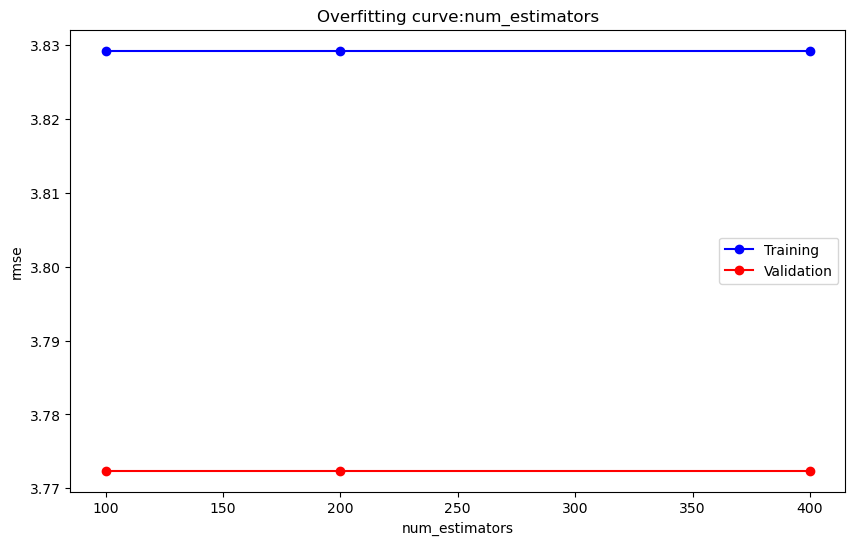

In [136]:
%%time
test_param_and_plot(XGBRegressor, 'num_estimators', [100,200,400],**best_params)

In [137]:
best_params['num_estimators'] = 100

# Max Depth

C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_job", "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscal

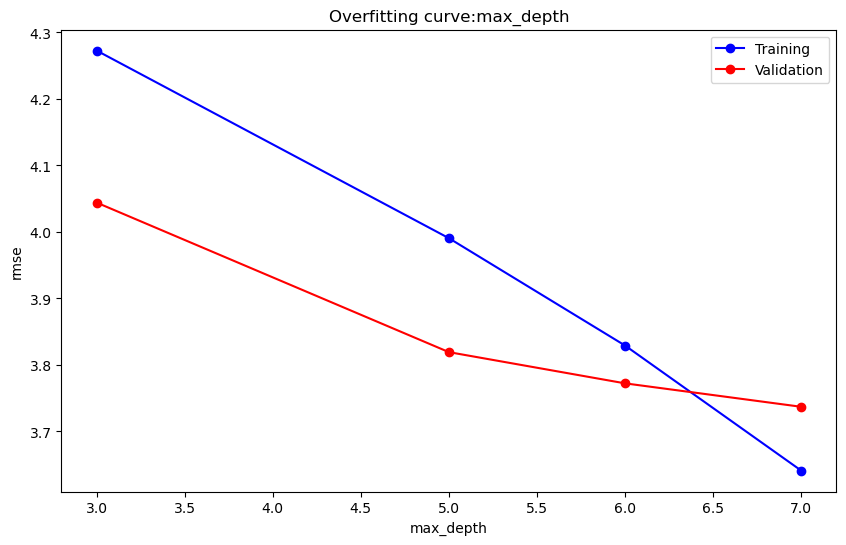

In [138]:
test_param_and_plot(XGBRegressor,'max_depth',[3,5,6,7], **best_params)

Looks like a max depth of 7 is idead

In [139]:
best_params['max_depth'] = 7

# Learning Rate

C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:21:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_job", "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:21:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscal

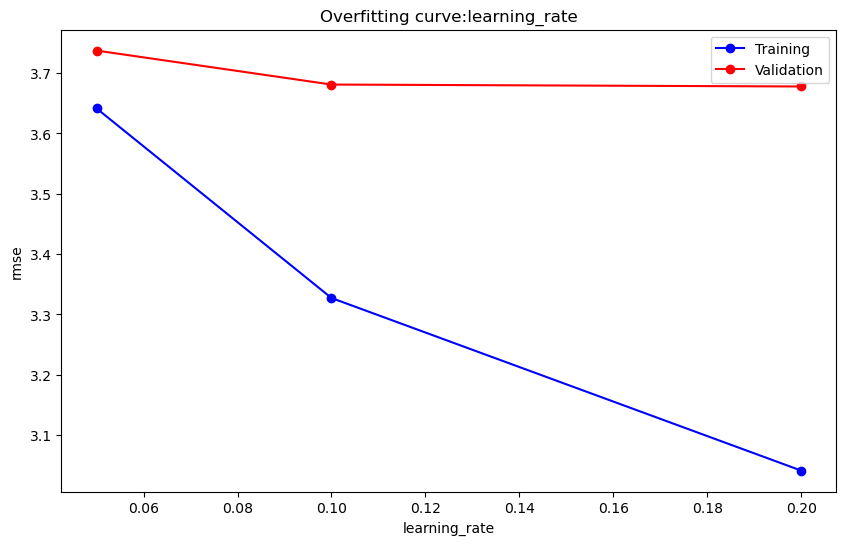

In [140]:
test_param_and_plot(XGBRegressor,'learning_rate',[0.05,0.1,0.2], **best_params)

seems like the best learning rate is 0.25

In [141]:
best_params['learning_rate'] = 0.25

# Other parameters

Simirly we can experiment with other parameters
Here's set of parameters that work well:



In [142]:
xgb_model_final = XGBRegressor(objective = 'reg:squarederror', 
                               n_job = -1, 
                               random_state = 42, 
                               n_estimators =500, 
                               max_depth = 8, 
                               learning_rate = 0.08, 
                               subsample =0.8, 
                               colsample_bytetree =0.8)

In [143]:
xgb_model_final.fit(train_inputs, train_targets)

C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:21:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytetree", "n_job" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytetree=0.8, colsample_bytree=None, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_job=-1, n_jobs=None, ...)

In [144]:
evaluate(xgb_model_final)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2.3891788,
 3.6455553,
 array([14.219172 ,  8.574025 , 32.304382 , ..., 16.80554  ,  9.591344 ,
         3.8037539], dtype=float32),
 array([17.10515  ,  5.3752317,  8.724776 , ..., 15.076037 ,  4.247043 ,
         8.2467375], dtype=float32))

In [145]:
predict_and_submit(xgb_model_final, test_inputs,'xgb_tuned_model_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.021079
1,2015-01-27 13:08:24.0000003,11.272052
2,2011-10-08 11:53:44.0000002,4.507194
3,2012-12-01 21:12:12.0000002,8.932503
4,2012-12-01 21:12:12.0000003,16.116211
...,...,...
9909,2015-05-10 12:37:51.0000002,8.682832
9910,2015-01-12 17:05:51.0000001,10.741588
9911,2015-04-19 20:44:15.0000001,56.386108
9912,2015-01-31 01:05:19.0000005,19.419472


This puts at 460th position out of 1483 i.e top 30% in the Kaggle score competion. This is pretty amazing considering :
 * The mode has achieved RMSE of 2.38 dollar in the Training data and 3.64 dollar in the validation.
 * We are just using 1% of training data
 * We are only using a single model ( most top submissions use  ensemble)
 * Our top model takes us just 10 minutes to train (as oppose to and hour or a day)
 * We haven't fully optimized the hyperparameters yet

Let's save the weight of the model in our GITHUB: https://github.com/NC20965

# Deploy using flask

Import flask dependancies and save model as pickle file

In [147]:
import pickle

pickle.dump(xgb_model_final,open("xgb_model_final.pkl","wb"))

# Train on GPU with entire dataset
Steps:
 * Install dask, cudf, and cuml
 * Load dataset on GPU
 * Create training and validation set
 * Perfom feature engineering
 * Train XGBoost cuml model